In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv("./data/statlog_heart/heart_data.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [9]:
X = df.drop("heart_disease", axis=1)
Y = df["heart_disease"]

print(X.shape, Y.shape)

(270, 13) (270,)


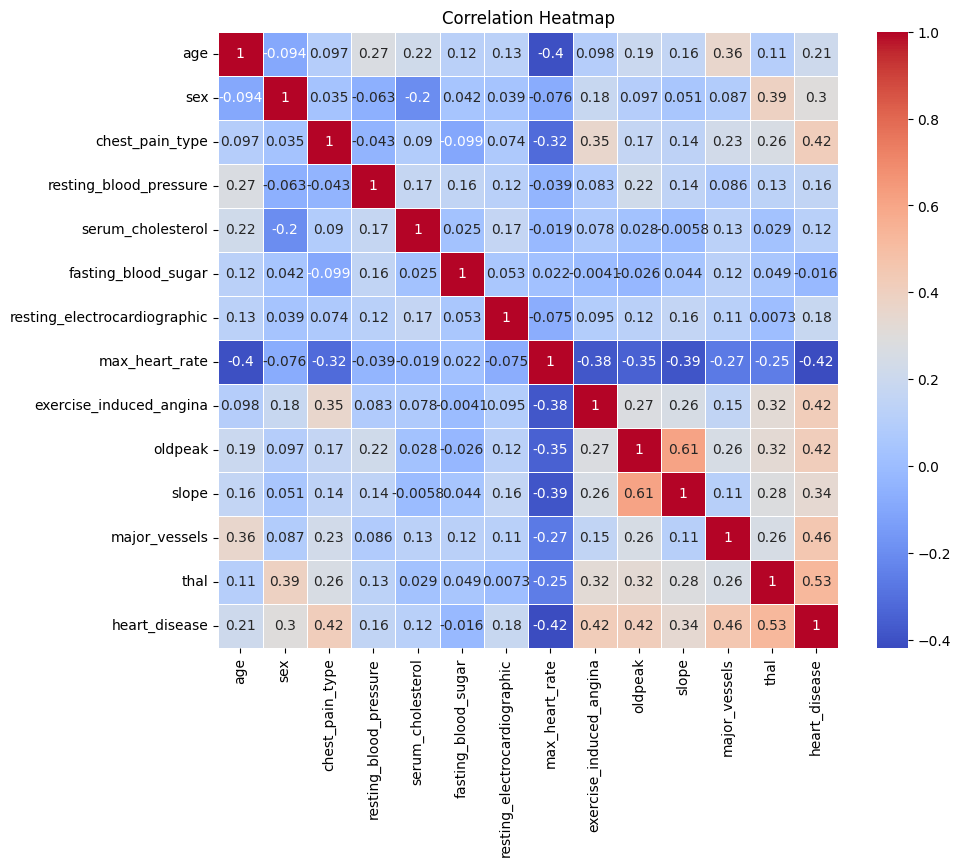

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

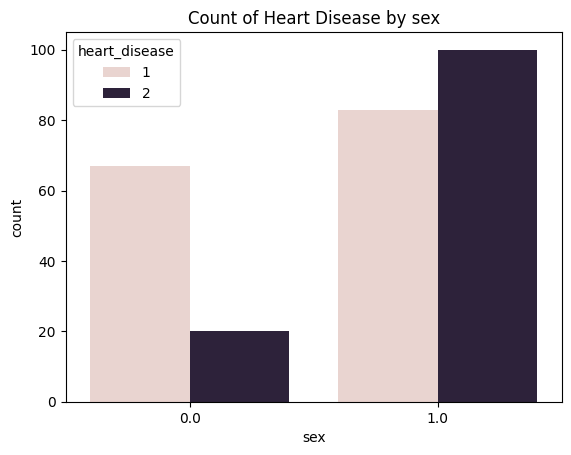

In [11]:
sns.countplot(x='sex', hue='heart_disease', data=df)
plt.title('Count of Heart Disease by sex')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = np.array(Y).reshape(-1, 1) 

In [13]:
from sklearn.model_selection import train_test_split

# split the data into train, validation and test set (70%, 10%, 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, train_size=0.334, random_state=42)

print("Data: ", X.shape, Y.shape)
print("Train set:", X_train.shape, Y_train.shape)
print("Validation set:", X_valid.shape, Y_valid.shape)
print("Test set:", X_test.shape, Y_test.shape)

Data:  (270, 13) (270, 1)
Train set: (189, 13) (189, 1)
Validation set: (27, 13) (27, 1)
Test set: (54, 13) (54, 1)


### Let the Fun Begin! 

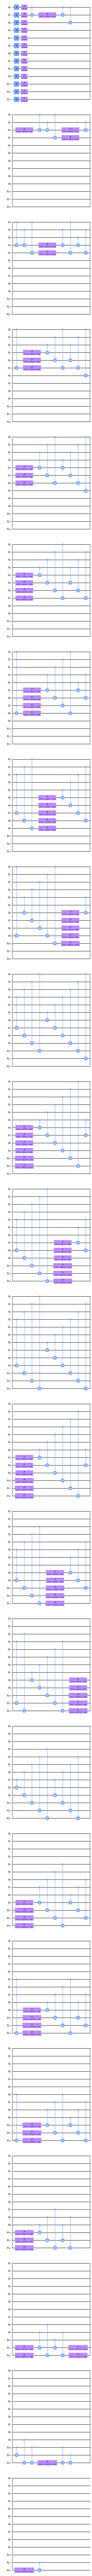

In [14]:
from qiskit.circuit.library import  ZZFeatureMap
num_features = X.shape[1]

feature_map = ZZFeatureMap(
    feature_dimension=num_features, 
    reps=1
)
feature_map.decompose().draw(
    output="mpl",
    style="clifford",
    fold=10
)

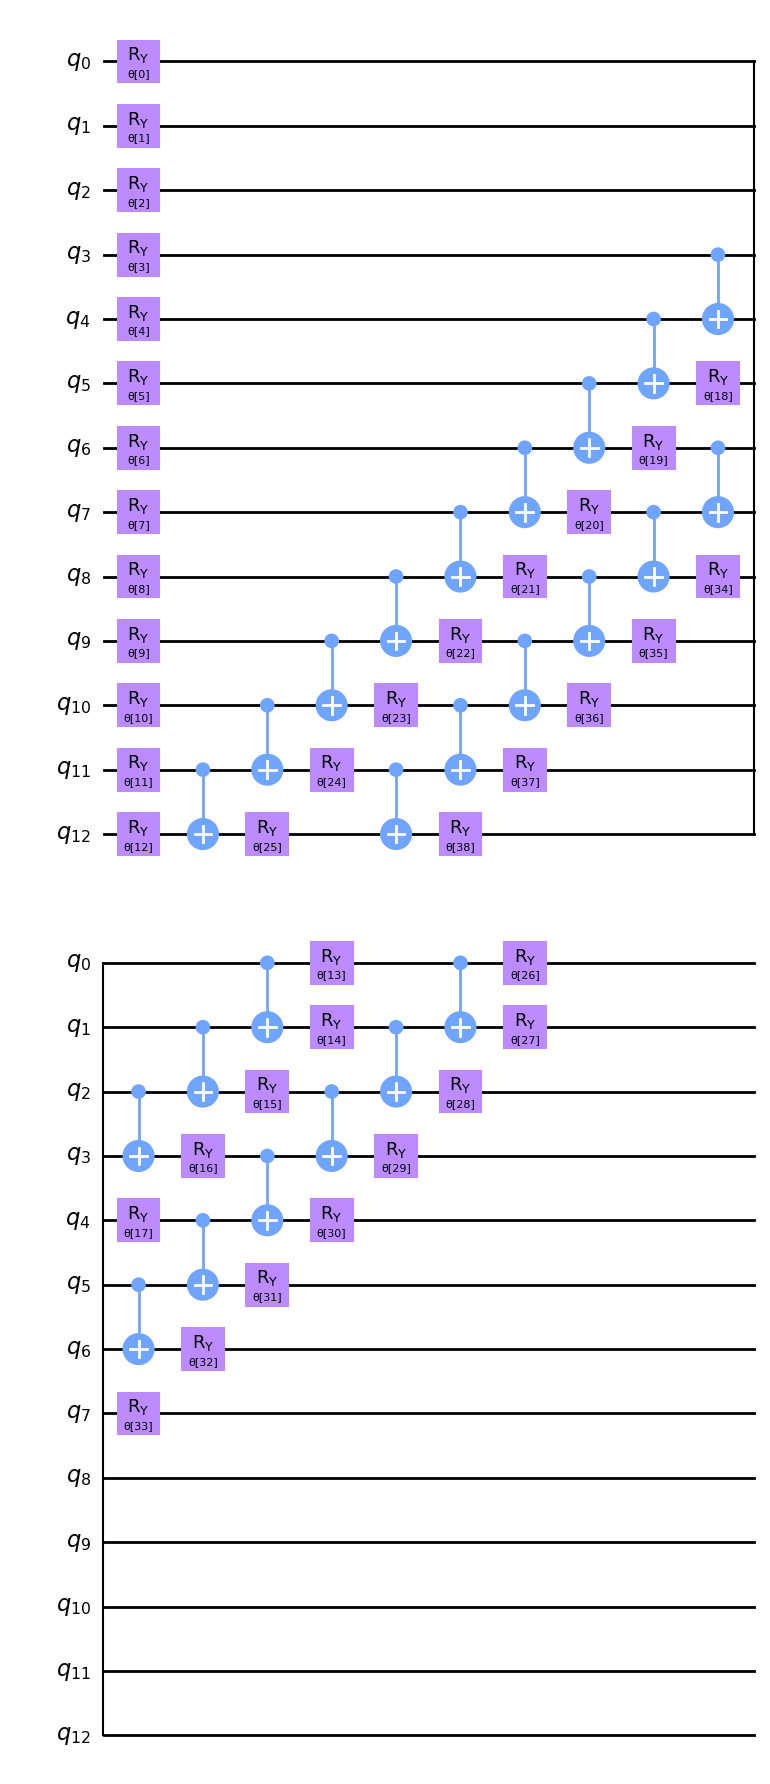

In [15]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(
    num_qubits=num_features,
    reps=2,
)

ansatz.decompose().draw(
    output="mpl",
    style="clifford",
    fold=10
)


In [16]:
from qiskit_algorithms.optimizers import COBYLA 

optimizer = COBYLA(maxiter=30)


In [17]:
from qiskit.primitives import Sampler
sampler = Sampler()


C:\Users\ashad\AppData\Local\Temp\ipykernel_13408\2047612474.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [18]:
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective Function Value at Step {}".format(len(objective_func_vals)))
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [19]:
# import time
# from qiskit_machine_learning.algorithms.classifiers import QSVC

# qsvc = QSVC(
    

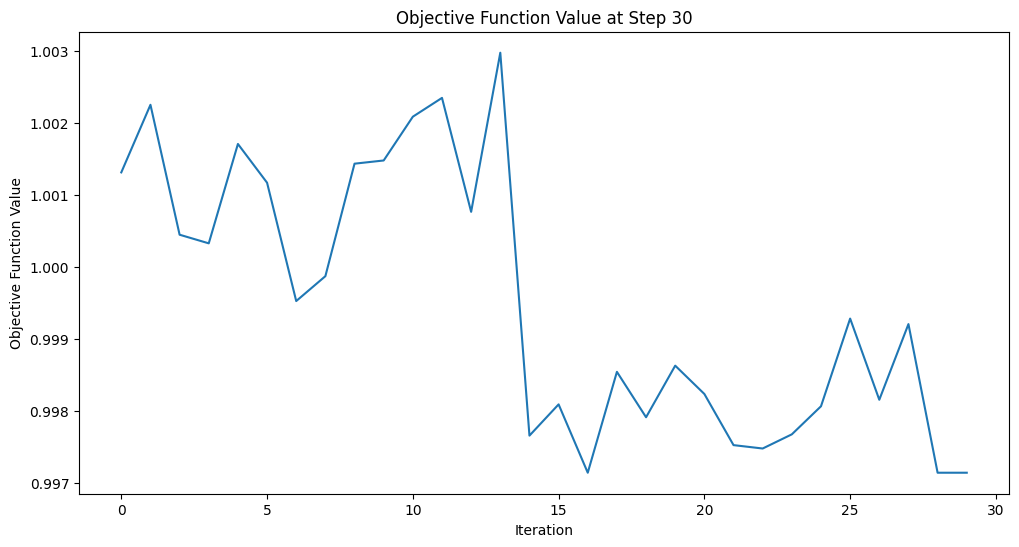

Training Time:  3582.87 s


In [20]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train, Y_train)
end = time.time()

print("Training Time: ", round(end-start, 2), "s")

In [21]:
train_score_q2_ra = vqc.score(X_train, Y_train)
test_score_q2_ra = vqc.score(X_test, Y_test)

print(f"Quantum VQC Train Score: {train_score_q2_ra:.4f}")
print(f"Quantum VQC Test Score: {test_score_q2_ra:.4f}")

Quantum VQC Train Score: 0.5344
Quantum VQC Test Score: 0.6111
